In [1]:
# Import necessary libraries
import numpy as np  # import library for working with arrays and matrices
import cv2  # import library for image processing
import matplotlib.pyplot as plt  # import library for plotting
import mahotas # imort library for image processing
import pandas as pd
from pyfeats import *

In [2]:
import glob

def load_image(arr):
    strr = "brick/*.jpg"
    for file in glob.glob(strr):
        img=cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        arr.append(img)
    return arr

In [3]:
# 1 = bare bricks
# 2 = brown bricks
# 3 = dirty bricks
# 4 = painted bricks
# 5 = clean bricks
# 6 = sloppy bricks
target = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]

In [28]:
data=[]
data=load_image(data)
print('total image: ',len(data))

total image:  120


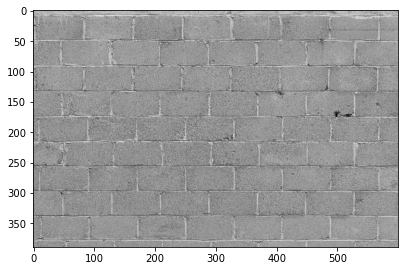

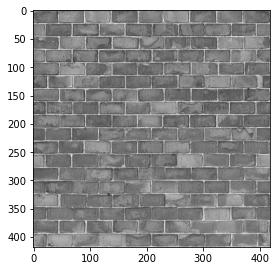

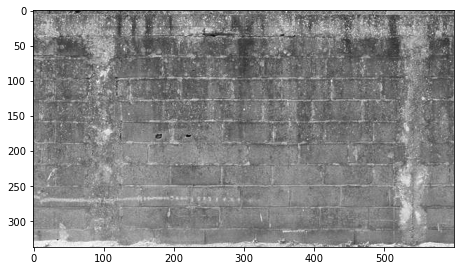

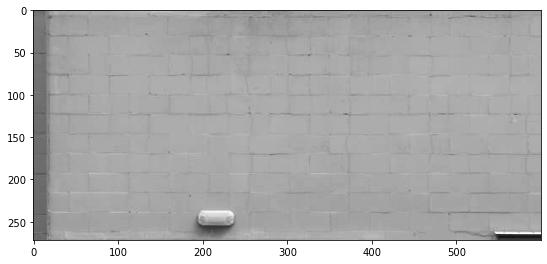

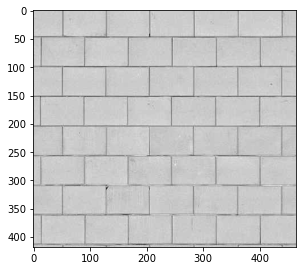

In [5]:
for i, image in enumerate(data):
    if i == 1 or i == 21 or i == 41 or i == 61 or i == 81:
        fig = plt.figure(figsize=(20,20))
        ax1 = fig.add_subplot(4,2,2)
        ax1.imshow(image, cmap=plt.cm.gray)

In [6]:
labels_fof = ["Mean","Variance","Median","Mode","Skewness",
              "Kurtosis","Energy","Entropy","MinimalGrayLevel",
              "MaximalGrayLevel","CoefficientOfVariation",
              "10Percentile","25Percentile","75Percentile",
              "90Percentile","HistogramWidth"]

In [7]:
df1 = pd.DataFrame({'Parsing': labels_fof})

In [8]:
df_fof_cols = {}
for i, image in enumerate(data):
    first_order_features = {}
    first_order_features['A_FOS'] = fos(image,None)
    df_fof_cols["Image_" + str(i+1)] = first_order_features['A_FOS'][0]

In [9]:
df2 = pd.DataFrame(df_fof_cols)

In [10]:
df2.head()

,Image_1,Image_2,Image_3,Image_4,Image_5,Image_6,Image_7,Image_8,Image_9,Image_10,...,Image_111,Image_112,Image_113,Image_114,Image_115,Image_116,Image_117,Image_118,Image_119,Image_120
0,147.562241,148.788631,160.557625,168.593596,151.497043,157.617172,141.194023,157.336671,154.577106,132.746069,...,154.187194,150.350389,169.455543,169.220439,163.683673,164.321884,160.185064,162.729112,165.422692,156.752597
1,352.015353,326.518589,281.835141,279.976105,361.894759,416.246612,320.097587,505.309123,303.214970,422.964184,...,580.619865,1039.360049,853.336459,841.973947,977.148577,997.863082,653.637866,952.568448,1000.443667,491.007918
2,148.000000,149.000000,161.000000,172.000000,152.000000,159.000000,142.000000,159.000000,156.000000,132.000000,...,158.000000,156.000000,174.000000,174.000000,166.000000,162.000000,162.000000,166.000000,167.000000,161.000000
3,149.000000,149.000000,162.000000,174.000000,152.000000,160.000000,154.000000,158.000000,158.000000,128.000000,...,165.000000,158.000000,185.000000,184.000000,166.000000,157.000000,161.000000,175.000000,169.000000,165.000000
4,-0.320142,-0.133270,-0.809424,-1.691257,-0.910856,-2.111023,-0.526079,-0.702427,-0.856249,-0.551304,...,-1.173573,-1.156245,-1.249892,-1.478894,-0.998210,-0.120992,-0.993430,-0.803591,-0.550055,-1.402738


In [11]:
df_fof = pd.concat([df1, df2],
                  axis = 1)

In [12]:
df_fof.head()

,Parsing,Image_1,Image_2,Image_3,Image_4,Image_5,Image_6,Image_7,Image_8,Image_9,...,Image_111,Image_112,Image_113,Image_114,Image_115,Image_116,Image_117,Image_118,Image_119,Image_120
0,Mean,147.562241,148.788631,160.557625,168.593596,151.497043,157.617172,141.194023,157.336671,154.577106,...,154.187194,150.350389,169.455543,169.220439,163.683673,164.321884,160.185064,162.729112,165.422692,156.752597
1,Variance,352.015353,326.518589,281.835141,279.976105,361.894759,416.246612,320.097587,505.309123,303.214970,...,580.619865,1039.360049,853.336459,841.973947,977.148577,997.863082,653.637866,952.568448,1000.443667,491.007918
2,Median,148.000000,149.000000,161.000000,172.000000,152.000000,159.000000,142.000000,159.000000,156.000000,...,158.000000,156.000000,174.000000,174.000000,166.000000,162.000000,162.000000,166.000000,167.000000,161.000000
3,Mode,149.000000,149.000000,162.000000,174.000000,152.000000,160.000000,154.000000,158.000000,158.000000,...,165.000000,158.000000,185.000000,184.000000,166.000000,157.000000,161.000000,175.000000,169.000000,165.000000
4,Skewness,-0.320142,-0.133270,-0.809424,-1.691257,-0.910856,-2.111023,-0.526079,-0.702427,-0.856249,...,-1.173573,-1.156245,-1.249892,-1.478894,-0.998210,-0.120992,-0.993430,-0.803591,-0.550055,-1.402738


In [13]:
labels_glcm = ["ASM", "Contrast", "Correlation",
              "SumOfSquaresVariance", "InverseDifferenceMoment",
               "SumAverage", "SumVariance", "SumEntropy",
               "Entropy", "DifferenceVariance",
               "DifferenceEntropy", "Information1",
               "Information2", "MaximalCorrelationCoefficient"]

In [14]:
df3 = pd.DataFrame({'Parsing': labels_glcm})

In [15]:
df_glcm_cols = {}
for i, image in enumerate(data):
    second_order_features = {}
    second_order_features['A_GLCM'] = glcm_features(image, ignore_zeros=True)
    df_glcm_cols["Image_" + str(i+1)] = second_order_features['A_GLCM'][0]

In [16]:
df4 = pd.DataFrame(df_glcm_cols)

In [17]:
df_glcm = pd.concat([df3, df4],
                  axis = 1)

In [18]:
df_glcm.head()

,Parsing,Image_1,Image_2,Image_3,Image_4,Image_5,Image_6,Image_7,Image_8,Image_9,...,Image_111,Image_112,Image_113,Image_114,Image_115,Image_116,Image_117,Image_118,Image_119,Image_120
0,ASM,0.000409,0.000545,0.000863,0.000745,0.000574,0.000480,0.000381,0.000758,0.000820,...,0.000336,0.000156,0.000186,0.000227,0.000389,0.000352,0.000465,0.000316,0.000308,0.000657
1,Contrast,522.911527,414.149990,327.863429,253.631760,293.565377,453.801271,351.023188,236.877955,144.150391,...,349.941948,785.270489,812.724487,675.537320,436.221732,483.331590,319.110491,502.537003,585.947294,314.806549
2,Correlation,0.254470,0.360978,0.414893,0.544828,0.588823,0.450631,0.448608,0.755322,0.754593,...,0.696701,0.618701,0.522384,0.597400,0.774674,0.754716,0.754290,0.732675,0.702582,0.677229
3,SumOfSquaresVariance,350.665010,324.127068,280.196272,278.587092,357.443601,412.917291,318.336708,487.696028,294.734342,...,576.960217,1029.734005,850.696929,838.884978,968.534197,985.763851,649.446310,940.053610,985.368302,487.651253
4,InverseDifferenceMoment,0.076149,0.098443,0.133227,0.116369,0.135002,0.092622,0.106084,0.208337,0.184571,...,0.105610,0.055398,0.063712,0.075073,0.139258,0.142489,0.150772,0.117867,0.120184,0.141191


In [19]:
df = pd.concat([df_fof, df_glcm], 
                  ignore_index = True)

In [20]:
df.head(30)

,Parsing,Image_1,Image_2,Image_3,Image_4,Image_5,Image_6,Image_7,Image_8,Image_9,...,Image_111,Image_112,Image_113,Image_114,Image_115,Image_116,Image_117,Image_118,Image_119,Image_120
0,Mean,147.562241,148.788631,160.557625,168.593596,151.497043,157.617172,141.194023,157.336671,154.577106,...,154.187194,150.350389,169.455543,169.220439,163.683673,164.321884,160.185064,162.729112,165.422692,156.752597
1,Variance,352.015353,326.518589,281.835141,279.976105,361.894759,416.246612,320.097587,505.309123,303.214970,...,580.619865,1039.360049,853.336459,841.973947,977.148577,997.863082,653.637866,952.568448,1000.443667,491.007918
2,Median,148.000000,149.000000,161.000000,172.000000,152.000000,159.000000,142.000000,159.000000,156.000000,...,158.000000,156.000000,174.000000,174.000000,166.000000,162.000000,162.000000,166.000000,167.000000,161.000000
3,Mode,149.000000,149.000000,162.000000,174.000000,152.000000,160.000000,154.000000,158.000000,158.000000,...,165.000000,158.000000,185.000000,184.000000,166.000000,157.000000,161.000000,175.000000,169.000000,165.000000
4,Skewness,-0.320142,-0.133270,-0.809424,-1.691257,-0.910856,-2.111023,-0.526079,-0.702427,-0.856249,...,-1.173573,-1.156245,-1.249892,-1.478894,-0.998210,-0.120992,-0.993430,-0.803591,-0.550055,-1.402738
5,Kurtosis,5.631919,6.338022,7.938976,7.072122,6.025511,11.675705,3.048064,6.340885,4.489231,...,5.405566,4.736855,5.244016,6.159436,5.665263,3.939399,4.850531,5.427014,5.226767,7.865851
6,Energy,0.018445,0.020222,0.023745,0.023116,0.017498,0.019272,0.016107,0.015020,0.018308,...,0.013709,0.010682,0.011718,0.012462,0.011819,0.010598,0.013405,0.011427,0.011432,0.018141
7,Entropy,4.293883,4.229085,4.103883,4.073292,4.306531,4.252316,4.288016,4.456951,4.230446,...,4.521415,4.800367,4.698731,4.656848,4.700299,4.794123,4.578261,4.760292,4.770654,4.336125
8,MinimalGrayLevel,25.000000,0.000000,29.000000,56.000000,20.000000,0.000000,48.000000,28.000000,68.000000,...,8.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,MaximalGrayLevel,255.000000,254.000000,255.000000,222.000000,255.000000,232.000000,206.000000,255.000000,255.000000,...,255.000000,253.000000,255.000000,255.000000,255.000000,255.000000,251.000000,255.000000,255.000000,255.000000


In [21]:
# Use the values in column 1 as the index for the DataFrame
df = df.set_index('Parsing')

# Transpose the DataFrame and use the values from column 1 as new column headers
df_T = df.T.rename(columns=df.iloc[0])

# Remove the index name
df_T.index.name = None

df_T.head(50)

Parsing,Mean,Variance,Median,Mode,Skewness,Kurtosis,Energy,Entropy,MinimalGrayLevel,MaximalGrayLevel,...,InverseDifferenceMoment,SumAverage,SumVariance,SumEntropy,Entropy,DifferenceVariance,DifferenceEntropy,Information1,Information2,MaximalCorrelationCoefficient
Image_1,147.562241,352.015353,148.0,149.0,-0.320142,5.631919,0.018445,4.293883,25.0,255.0,...,0.076149,293.962478,879.748514,6.814901,12.149193,0.000104,5.459511,-0.033136,0.561520,3.852954
Image_2,148.788631,326.518589,149.0,149.0,-0.133270,6.338022,0.020222,4.229085,0.0,254.0,...,0.098443,296.355659,882.358284,6.796058,11.863079,0.000135,5.202257,-0.049266,0.643706,4.466192
Image_3,160.557625,281.835141,161.0,162.0,-0.809424,7.938976,0.023745,4.103883,29.0,255.0,...,0.133227,319.821873,792.921658,6.668824,11.389314,0.000182,4.902607,-0.070310,0.724979,4.477779
Image_4,168.593596,279.976105,172.0,174.0,-1.691257,7.072122,0.023116,4.073292,56.0,222.0,...,0.116369,335.913360,860.716609,6.606191,11.373571,0.000184,4.916442,-0.058533,0.668519,5.408634
Image_5,151.497043,361.894759,152.0,152.0,-0.910856,6.025511,0.017498,4.306531,20.0,255.0,...,0.135002,301.839486,1136.209025,7.057757,11.693741,0.000194,4.807043,-0.111099,0.846335,5.408066
Image_6,157.617172,416.246612,159.0,160.0,-2.111023,11.675705,0.019272,4.252316,0.0,232.0,...,0.092622,314.009602,1197.867894,6.873888,11.910230,0.000144,5.207172,-0.052621,0.658881,4.246861
Image_7,141.194023,320.097587,142.0,154.0,-0.526079,3.048064,0.016107,4.288016,48.0,206.0,...,0.106084,281.361508,922.323646,6.939268,11.990779,0.000156,5.189056,-0.055673,0.666110,4.441398
Image_8,157.336671,505.309123,159.0,158.0,-0.702427,6.340885,0.015020,4.456951,28.0,255.0,...,0.208337,313.075291,1713.906156,7.311921,11.447002,0.000291,4.369584,-0.210375,0.957584,4.896674
Image_9,154.577106,303.214970,156.0,158.0,-0.856249,4.489231,0.018308,4.230446,68.0,255.0,...,0.184571,308.268578,1034.786975,6.992725,11.154914,0.000273,4.320887,-0.163270,0.918956,4.845074
Image_10,132.746069,422.964184,132.0,128.0,-0.551304,7.681071,0.018164,4.318157,15.0,255.0,...,0.154580,264.456966,1459.146124,7.100453,11.534427,0.000222,4.598310,-0.141559,0.898825,5.823269


In [22]:
df_T['Target'] = target

In [23]:
df_T.head(120)

Parsing,Mean,Variance,Median,Mode,Skewness,Kurtosis,Energy,Entropy,MinimalGrayLevel,MaximalGrayLevel,...,SumAverage,SumVariance,SumEntropy,Entropy,DifferenceVariance,DifferenceEntropy,Information1,Information2,MaximalCorrelationCoefficient,Target
Image_1,147.562241,352.015353,148.0,149.0,-0.320142,5.631919,0.018445,4.293883,25.0,255.0,...,293.962478,879.748514,6.814901,12.149193,0.000104,5.459511,-0.033136,0.561520,3.852954,1
Image_2,148.788631,326.518589,149.0,149.0,-0.133270,6.338022,0.020222,4.229085,0.0,254.0,...,296.355659,882.358284,6.796058,11.863079,0.000135,5.202257,-0.049266,0.643706,4.466192,1
Image_3,160.557625,281.835141,161.0,162.0,-0.809424,7.938976,0.023745,4.103883,29.0,255.0,...,319.821873,792.921658,6.668824,11.389314,0.000182,4.902607,-0.070310,0.724979,4.477779,1
Image_4,168.593596,279.976105,172.0,174.0,-1.691257,7.072122,0.023116,4.073292,56.0,222.0,...,335.913360,860.716609,6.606191,11.373571,0.000184,4.916442,-0.058533,0.668519,5.408634,1
Image_5,151.497043,361.894759,152.0,152.0,-0.910856,6.025511,0.017498,4.306531,20.0,255.0,...,301.839486,1136.209025,7.057757,11.693741,0.000194,4.807043,-0.111099,0.846335,5.408066,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Image_116,164.321884,997.863082,162.0,157.0,-0.120992,3.939399,0.010598,4.794123,0.0,255.0,...,327.181869,3459.723813,7.774692,12.682248,0.000150,5.213751,-0.160079,0.938484,5.028325,6
Image_117,160.185064,653.637866,162.0,161.0,-0.993430,4.850531,0.013405,4.578261,0.0,251.0,...,318.966864,2278.674748,7.509515,12.124130,0.000194,4.882804,-0.158349,0.929434,5.241770,6
Image_118,162.729112,952.568448,166.0,175.0,-0.803591,5.427014,0.011427,4.760292,0.0,255.0,...,324.210027,3257.677436,7.725747,12.702018,0.000144,5.234089,-0.143283,0.916292,5.757776,6
Image_119,165.422692,1000.443667,167.0,169.0,-0.550055,5.226767,0.011432,4.770654,0.0,255.0,...,329.577871,3355.525913,7.725552,12.749676,0.000138,5.316516,-0.140433,0.916482,5.590613,6


Nilai 0 menunjukkan bahwa fitur tersebut tidak memberikan kontribusi dalam memprediksi label, sedangkan nilai maksimum menunjukkan bahwa fitur tersebut sangat berkontribusi dalam memprediksi label.

In [24]:
# Membaca data
X = df_T.iloc[:, :-1]
y = df_T.iloc[:, -1]
from sklearn.feature_selection import mutual_info_classif
scores = mutual_info_classif(X, y)

result_fs = pd.DataFrame({'feature_names': list(X.columns), 'scores': list(scores)})
result_fs = result_fs.sort_values("scores", ascending=False)

In [25]:
result_fs.head(100)

,feature_names,scores
3,Mode,0.604801
12,25Percentile,0.533052
2,Median,0.521761
13,75Percentile,0.515826
21,SumAverage,0.475674
11,10Percentile,0.469439
0,Mean,0.469208
4,Skewness,0.456927
20,InverseDifferenceMoment,0.429737
10,CoefficientOfVariation,0.425419


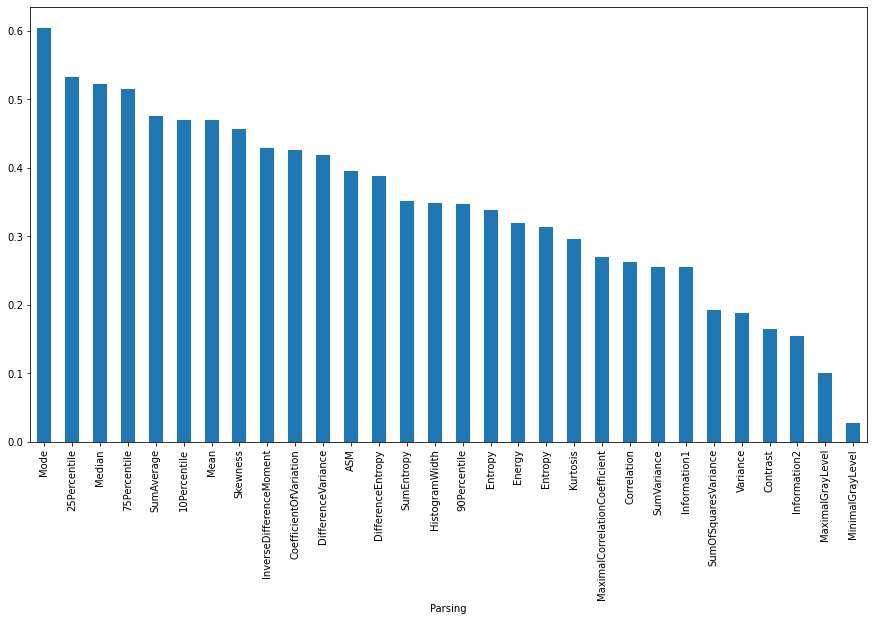

In [26]:
result_graph = pd.Series(scores, index=X.columns)
result_graph.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 8))  # Set the figure size to 10 inches by 8 inches
result_graph.plot.bar()
plt.show()  # Show the plot